In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output

In [170]:
# update the path to csv
df = pd.read_csv("USvideos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Let us find out how many titles of the trending videos contain captilazied word. 

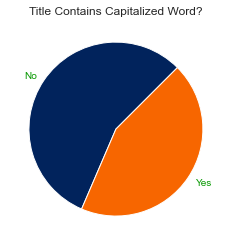

In [178]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#01235c', '#f76600'], textprops={'color': '#0a9904'}, startangle=45)
_ = ax.set_title('Title Contains Capitalized Word?')

It would be interesting to observe the distribution of likes across the dataset, let us only keep videos with 
number of likes less than 100,000 since that is the majority of videos for better visual.

/Users/sumit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


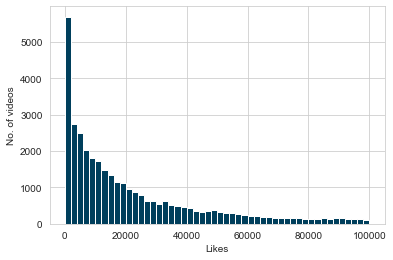

In [192]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Again, similar to likes, let us observe the distribution of number of comments across the trending videos.
Here too, the upper limit is kept as 200,000 since that is the majority of videos. This magnification helps us observe the trends in a better manner.

/Users/sumit/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


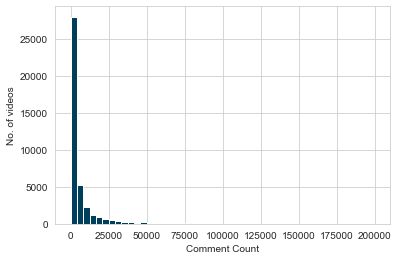

In [194]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Finally, we observe the relationship of the length of the title for the video to be trending. A clear observation from the following graph is that most of the trending videos have title lengths between 40 to 60 characters.

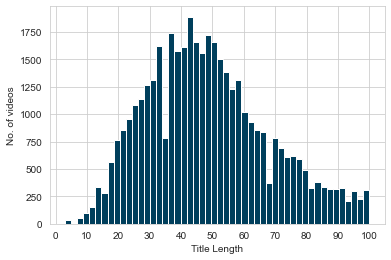

In [179]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color='#003f5c', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

This is observing whether there is a particular length of the title that leads to the more views for a video and a pattern can be observed. For title length around 50-60 characters, the videos have maxaimum views. This is inline with the previous observation.

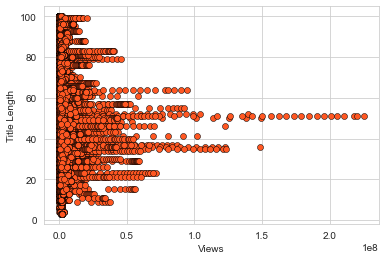

In [180]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color='#FF5722', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

This is plotting the correlation between different features of the data.

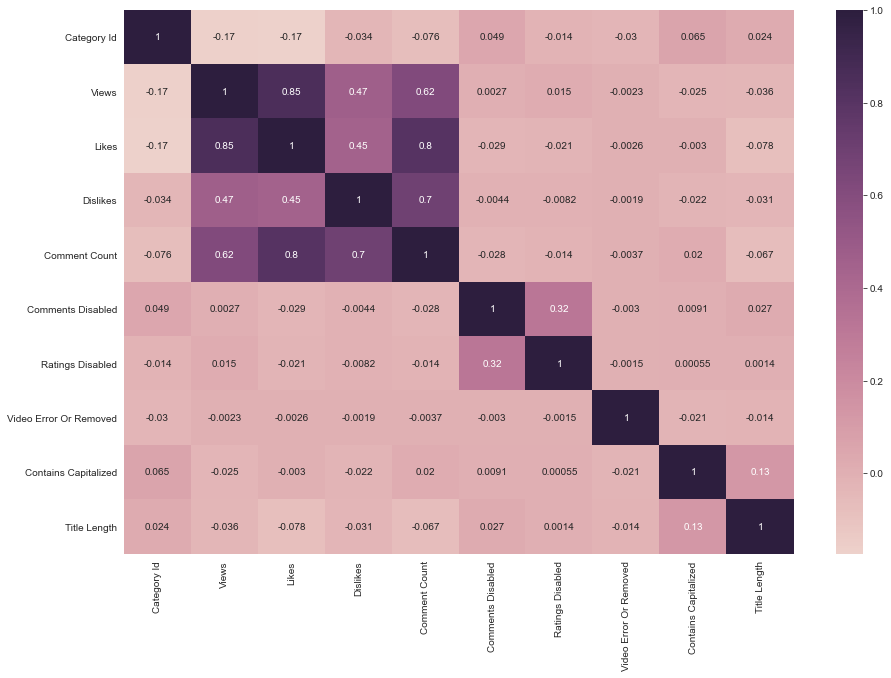

In [195]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(15,10))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

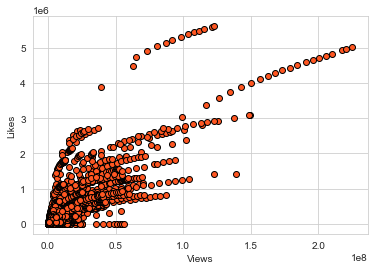

In [196]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color='#FF5722', edgecolors="#000000", linewidths=1)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [183]:
# pip install wordcloud

In [184]:
import datetime
import wordcloud
import json
# update the path to csv
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [185]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'contains_capitalized',
       'title_length', 'category_name'],
      dtype='object')

In [186]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

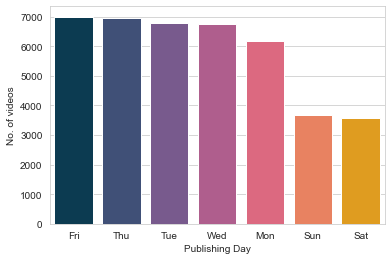

In [197]:
cdf = df["publishing_day"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

Interesting relationship oberved that most trending videos are published during the week days as compared to the weekend.

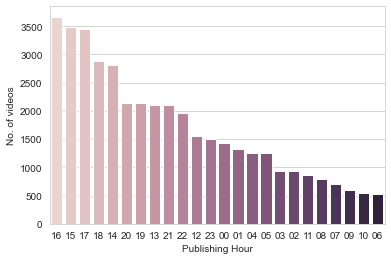

In [201]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

Another interesting pattern observed here for hour of the day. The maximum number of trending videos are published between 14:00-18:00 hour of the day.

Text(0.5, 1.0, 'Catogories vs number of videos')

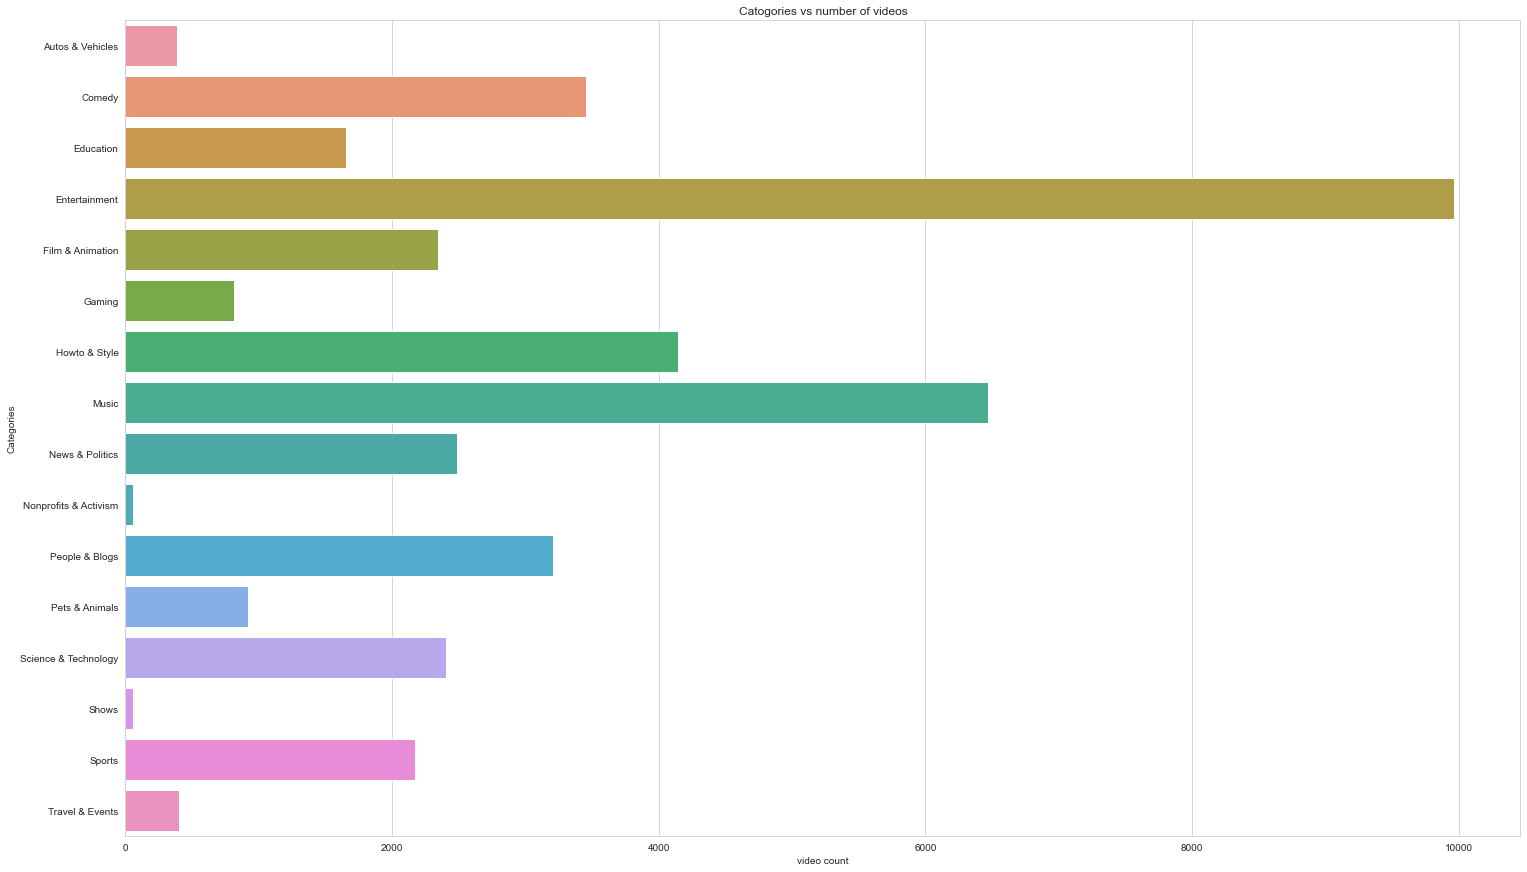

In [189]:
cat_df = df['category_name'].value_counts().sort_index().reset_index()
plt.figure(figsize=(25,15))
ax = sns.barplot(y=cat_df['index'],x=cat_df['category_name'], data=cat_df)
plt.xlabel("video count")
plt.ylabel("Categories")
plt.title("Catogories vs number of videos")

The video count per category is plotted and it can be seen that entertainment and music videos are most likely to be trending.

Text(0.5, 1.0, 'Channel title vs number of videos')

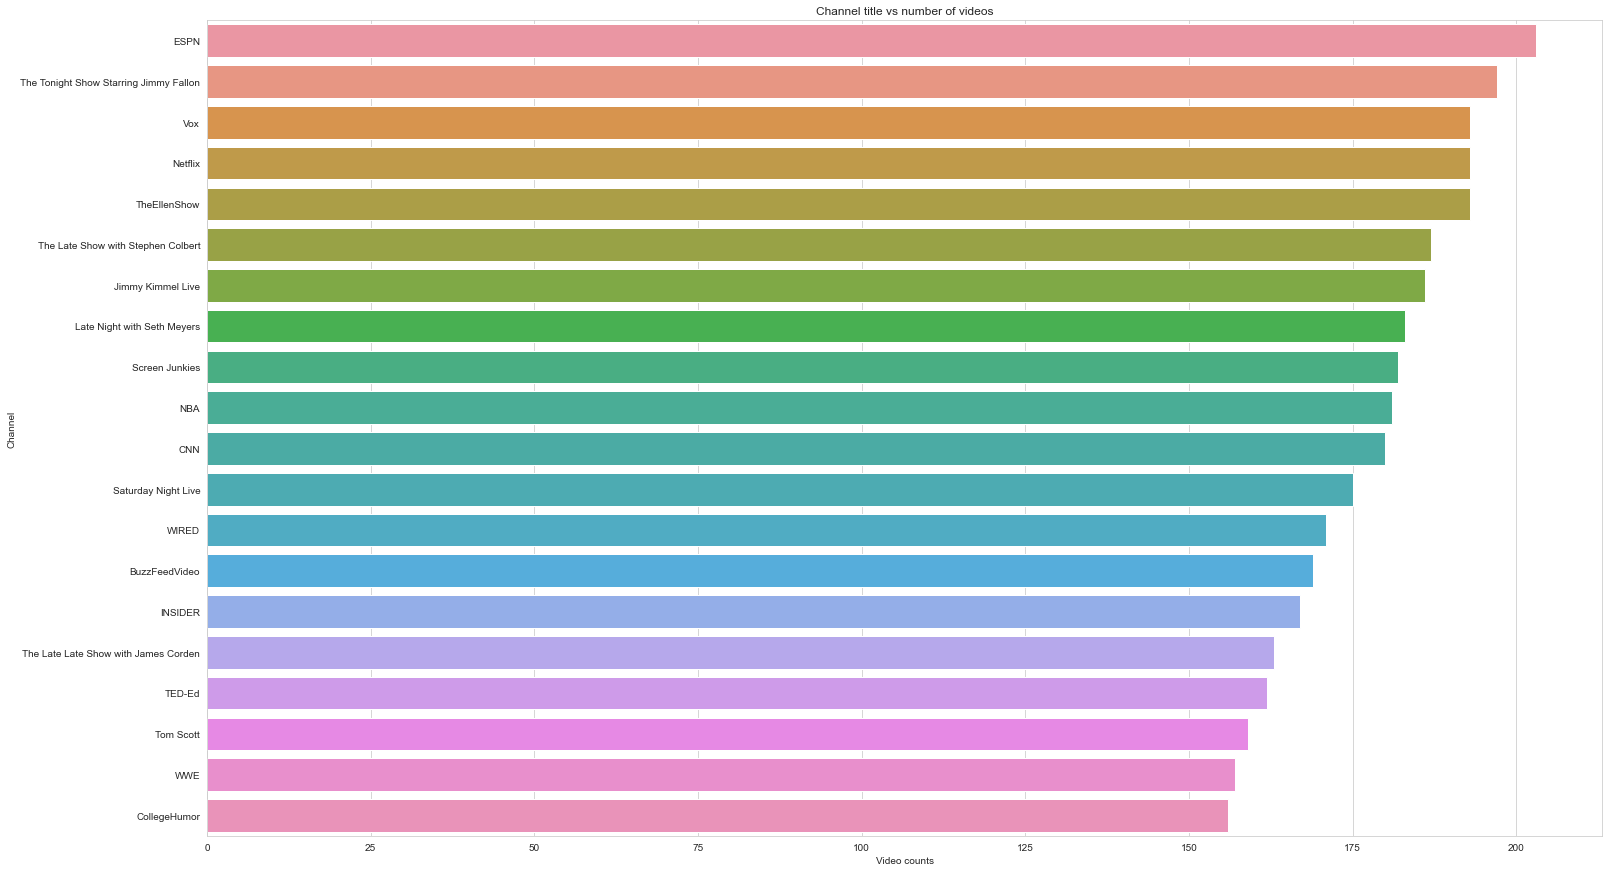

In [190]:
channel_df = df['channel_title'].value_counts().reset_index()
channel_df = channel_df[:20]
plt.figure(figsize=(25,15))
ax = sns.barplot(y=channel_df['index'],x=channel_df['channel_title'], data=channel_df)
plt.xlabel("Video counts")
plt.ylabel("Channel")
plt.title("Channel title vs number of videos")

Here, the most popular channels, that is channels with most videos on the trending page are plotted and again entertainment, sports, music channels top the list.